# Projet : ATT spam detector
# Modèle 2a : Transfert Leraning - Modèle BERT figé

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import keras_nlp
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("./data/spam.csv", encoding="cp1252")

print(df.shape)
display(df.head())

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(columns="Unnamed: 2", inplace=True)
df.drop(columns="Unnamed: 3", inplace=True)
df.drop(columns="Unnamed: 4", inplace=True)

df.drop_duplicates(inplace=True)

df.rename(columns={"v1": "sms_class"}, inplace=True)
df.rename(columns={"v2": "sms_brut"}, inplace=True)

df["sms_class"] = df["sms_class"].map({"ham":0,"spam":1})

print(df.shape)
display(df.head())

(5169, 2)


,sms_class,sms_brut
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X = df['sms_brut']
y = df['sms_class']
X_train, X_test , y_train, y_test = train_test_split(X, y , stratify = df["sms_class"], random_state = 42)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [ ]:
model_name = "bert_tiny_en_uncased_sst2"
# Pretrained classifier.
classifier = keras_nlp.models.BertClassifier.from_preset(
    model_name,
    num_classes=2,
    load_weights = True,
    activation='sigmoid'
)

100%|██████████| 454/454 [00:00<00:00, 455kB/s]


100%|██████████| 2.04k/2.04k [00:00<00:00, 878kB/s]


100%|██████████| 226k/226k [00:00<00:00, 46.1MB/s]


100%|██████████| 50.3M/50.3M [00:00<00:00, 115MB/s]


100%|██████████| 16.8M/16.8M [00:00<00:00, 103MB/s] 


In [ ]:
classifier.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    jit_compile=True,
     metrics=[tf.keras.metrics.Recall(name="recall"), tf.keras.metrics.Precision(name="precision"), "accuracy"],
)
# rendre les dernière couche de BERT entrainable (True)
# Figer les dernières couches (False)
classifier.backbone.trainable = False

In [9]:
history = classifier.fit(x=X_train, y=y_train, epochs = 50, validation_data=(X_test,y_test), batch_size=32)

Epoch 1/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.8402 - loss: 0.4633 - precision: 0.8361 - recall: 0.7846 - val_accuracy: 0.8693 - val_loss: 0.3422 - val_precision: 0.8691 - val_recall: 0.8677
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.8694 - loss: 0.3194 - precision: 0.8691 - recall: 0.8693 - val_accuracy: 0.8832 - val_loss: 0.2924 - val_precision: 0.8822 - val_recall: 0.8863
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.8846 - loss: 0.2769 - precision: 0.8862 - recall: 0.8873 - val_accuracy: 0.8979 - val_loss: 0.2617 - val_precision: 0.8975 - val_recall: 0.9002
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.9046 - loss: 0.2555 - precision: 0.9011 - recall: 0.9058 - val_accuracy: 0.9111 - val_loss: 0.2420 - val_precision: 0.9085 - val_recall: 0.9142
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.9118 - loss: 0.2412 - precision: 0.9112 - recall: 0.9130 - val_accuracy: 0.9126 - val_los

In [10]:
classifier.evaluate(X_test, y_test,batch_size=32)

41/41 ━━━━━━━━━━━━━━━━━━━━ 32s 752ms/step - accuracy: 0.9403 - loss: 0.1465 - precision: 0.9403 - recall: 0.9403


[0.13822481036186218, 0.949729323387146, 0.949729323387146, 0.949729323387146]

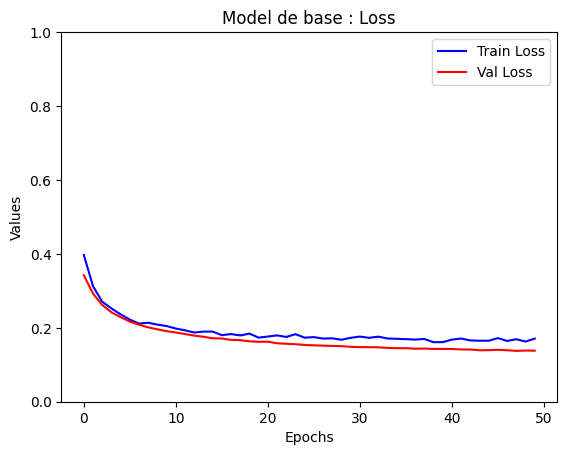

In [11]:
plt.plot(history.history["loss"], color="b", label="Train Loss")
plt.plot(history.history["val_loss"], color="r", label="Val Loss")
plt.ylabel("Values")
plt.xlabel("Epochs")
plt.title("Model de base : Loss")
plt.legend()
plt.ylim(0,1)
plt.show()

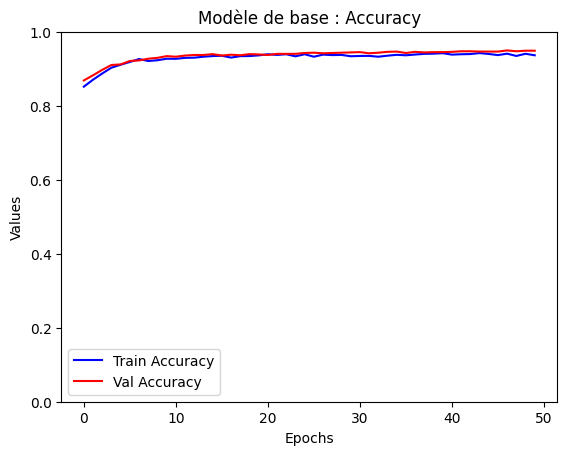

In [12]:
plt.plot(history.history["accuracy"], color="b", label="Train Accuracy")
plt.plot(history.history["val_accuracy"], color="r", label="Val Accuracy")
plt.ylabel("Values")
plt.xlabel("Epochs")
plt.title("Modèle de base : Accuracy")
plt.legend()
plt.ylim(0,1)
plt.show()

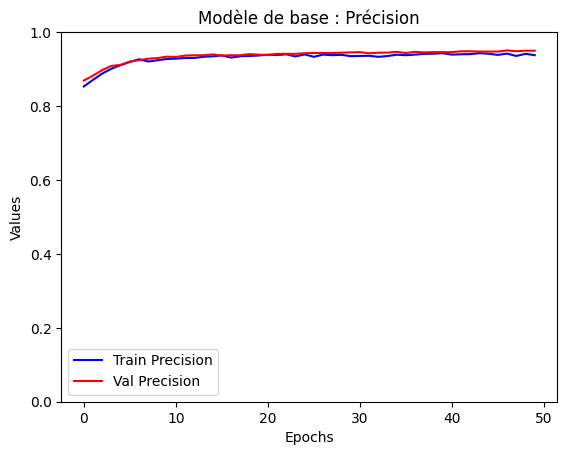

In [13]:
plt.plot(history.history["precision"], color="b", label="Train Precision")
plt.plot(history.history["val_precision"], color="r", label="Val Precision")
plt.ylabel("Values")
plt.xlabel("Epochs")
plt.title("Modèle de base : Précision")
plt.legend()
plt.ylim(0,1)
plt.show()

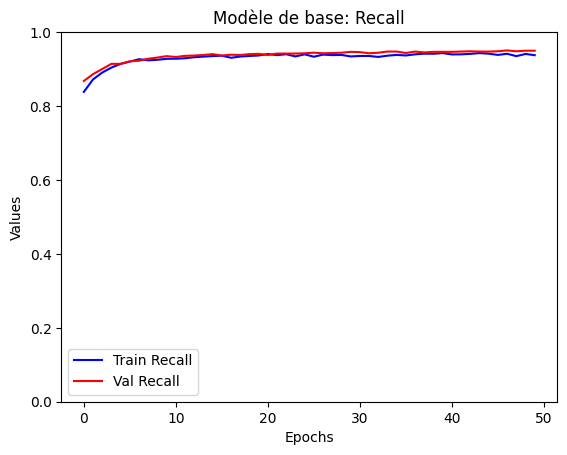

In [14]:
plt.plot(history.history["recall"], color="b", label="Train Recall")
plt.plot(history.history["val_recall"], color="r", label="Val Recall")
plt.ylabel("Values")
plt.xlabel("Epochs")
plt.title("Modèle de base: Recall")
plt.legend()
plt.ylim(0,1)
plt.show()

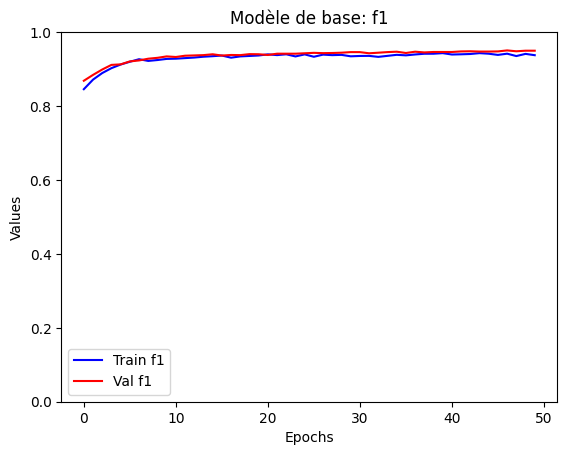

In [15]:
recall = history.history["recall"]
precision = history.history["precision"]

f1 = pd.DataFrame()
f1["f1"] =  2*np.array(recall)*np.array(precision)/(np.array(recall)+np.array(precision)+tf.keras.backend.epsilon())

val_recall = history.history["val_recall"]
val_precision = history.history["val_precision"]

val_f1 = pd.DataFrame()
val_f1["val_f1"] =  2*np.array(val_recall)*np.array(val_precision)/(np.array(val_recall)+np.array(val_precision)+0.00000001)

plt.plot(f1["f1"], color="b", label="Train f1")
plt.plot(val_f1["val_f1"], color="r", label="Val f1")
plt.ylabel("Values")
plt.xlabel("Epochs")
plt.title("Modèle de base: f1")
plt.legend()
plt.ylim(0,1)
plt.show()

### Synthèse résultat modele

In [16]:
print("**Train :")
print("Loss :", list(history.history["loss"])[-1])
print("Accuracy :", list(history.history["accuracy"])[-1])
print("precision :", list(history.history["precision"])[-1])
print("Recall :", list(history.history["recall"])[-1])
print("f1 :", list(f1["f1"])[-1])
print()
print("**Test :")
print("Loss :", list(history.history["val_loss"])[-1])
print("Accuracy :", list(history.history["val_accuracy"])[-1])
print("precision :", list(history.history["val_precision"])[-1])
print("Recall :", list(history.history["val_recall"])[-1])
print("f1 :", list(val_f1["val_f1"])[-1])

**Train :
Loss : 0.17071786522865295
Accuracy : 0.9373065233230591
precision : 0.937564492225647
Recall : 0.937564492225647
f1 : 0.9375644422256496

**Test :
Loss : 0.13822481036186218
Accuracy : 0.949729323387146
precision : 0.949729323387146
Recall : 0.949729323387146
f1 : 0.949729318387146


In [18]:
history.history

{'accuracy': [0.8524251580238342,
  0.8712590336799622,
  0.8880289196968079,
  0.9037667512893677,
  0.9117646813392639,
  0.9192466735839844,
  0.9272446036338806,
  0.9218266010284424,
  0.9238905906677246,
  0.9280185699462891,
  0.9277606010437012,
  0.9303405284881592,
  0.9308565258979797,
  0.9334365129470825,
  0.9352425336837769,
  0.9360164999961853,
  0.9311145544052124,
  0.9349845051765442,
  0.9352425336837769,
  0.9370484948158264,
  0.9401444792747498,
  0.9383385181427002,
  0.9401444792747498,
  0.9344685077667236,
  0.9401444792747498,
  0.9334365129470825,
  0.9391124844551086,
  0.9378225207328796,
  0.9383385181427002,
  0.9347265362739563,
  0.9355005025863647,
  0.9357585310935974,
  0.9334365129470825,
  0.936274528503418,
  0.9385964870452881,
  0.9373065233230591,
  0.9393705129623413,
  0.9411764740943909,
  0.9416924715042114,
  0.9429824352264404,
  0.9391124844551086,
  0.9401444792747498,
  0.9406604766845703,
  0.9432404637336731,
  0.9409184455871582,

In [17]:
classifier.summary()

Preprocessor: "bert_preprocessor_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ bert_tokenizer (BertTokenizer)                                │                       Vocab size: 30,522 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "bert_classifier_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ segment_ids (InputLayer)      │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bert_backbone (BertBackbone)  │ [(None, 128), (None,      │       4,385,920 │ padding_mask[0][0],        │
│                               │ None, 128)]               │                 │ segment_ids[0][0],         │
│                               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ classifier_dropout (Dropout)  │ (None, 128)               │               0 │ bert_backbone[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │             258 │ classifier_dropout[0][0]   │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 4,386,696 (16.73 MB)

 Trainable params: 258 (1.01 KB)

 Non-trainable params: 4,385,920 (16.73 MB)

 Optimizer params: 518 (2.03 KB)